# Phase 1 Project

Student Name: Elsie Lovell Kiprop

DS15 Fulltime

# Introduction

Microsoft has seen other big companies venture into making films.They would also love to jump in on the fun. However, Microsoft does not know anything about film creation. Therefore we are tasked with finding recommendations on how Microsoft can venture into film creation successfully. For this analysis I will use the ```'bom.movie_gross.xlsx'``` dataset to provide recommendations on what films microsoft should create in order to optimise their revenues from film creation. The data set contains movie titles and how much income they bring in in the domestic and foreign markets. The year or release is also included in the dataset. The analysis of this data will be done in part 1.

To get further insights, I will also be using the ```'tmdb.movies.xlsx'```. This data set contains information on the popularity of various movies. It also contains information on the votes as well as the languages used in each of the films. This data set will provide insights on what movies Microsoft Should create to gain popularity. The analysis of this data will be done in part 2.

# Part 1: Analysis of the movie gross data

The first analysis is of the ```'bom.movie_gross.xlsx'``` data to find out which movies are bringing in the highest revenue. This will help advise Microsoft on the financial side.

## Loading Data 

The first part is to load the data set. Therefore I imported the relevant packages required for this.

In [2]:
#Importing all the relevant packages.
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#Loading the data usind the 'pd.read_excel()' method.
movie_gross=pd.read_excel('bom.movie_gross.xlsx')

## Nature of the data

In this part I will explore the features of the data. This includes checking for the data types, checking for the first five and last 5 rows of the dataset.
Furthermore, I will check for the presence of null values as well as duplicates

In [4]:
#Checksing the first five rows of the data
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [5]:
#Checking the last 5 rows of the data
movie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [6]:
#The info method is used to find general information on the data.
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


From the above, we see that there are 3387 entries. We also see that the column ```'title'``` and ```'studio'``` contain elements with data type object. ```'domestic_gross'``` and ```'foreign_gross'``` elements of the data type float while ```'year'``` is of the data type integer.
It is also important to notice that there are null values in the data. This is evident in the columns: ```'studio'``` , ```'domestic_gross'```  and ```'foreign_gross'```

We can also see that there are missing values in the ```'domestic_gross'``` , ```'foreign_gross'``` and ```'studio'``` columns. I will get deeper in this later in the data cleaning part.

In the cell below we use the .nunique() method to find the number of unique values in each of the columns

In [7]:
#Finding the number of unique values 
movie_gross.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

## Cleaning the data 

Before doing data analysis, the data has to be cleaned. This includes dealing with the missing values. The columns ```'domestic_gross'``` ,```'foreign_gross'``` and ```'studio'``` columns have missing values.
For the ```'domestic_gross'``` and ```'foreign_gross'``` columns the missing values will be replaced with the mean of the respective columns.
For the ```'studio' column'``` the since there are only 5 null values they are negligible and I will leave the column as is.



In [8]:
# Replacing the missing values in the 'domestic_gross' column with its mean
movie_gross.domestic_gross=movie_gross.domestic_gross.fillna(movie_gross.domestic_gross.mean())

In [9]:
# Replacing the missing values in the 'domestic_gross' column with its mean
movie_gross.foreign_gross=movie_gross.foreign_gross.fillna(movie_gross.foreign_gross.mean())

In [10]:
#Checking the nature of the data after cleaning
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


# Exploring and analysing the data

Now that we have cleaned the data, we can now explore the data and do an analysis in order to find the optimal recommendations for Microsoft. This part will include descriptive statistics and visualizations.

In [11]:
# We will use the method .describe() in order to find the statistical summary of the data.
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.387000e+03,3.387000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.670497e+07,1.065530e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.225000e+05,1.160000e+07,2012.000000
50%,1.400000e+06,7.487281e+07,2014.000000
75%,2.874585e+07,7.487281e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


The above results show the number of values in the rows. The means, standard deviation of the columns are also shown in the results. The minimum and maximum values have also been shown above.

We can go ahead to find the total gross of the movies which will be done by adding the domestic gross to the foreign gross to find the total revenue brought in by the movies.

In [12]:
# Finding the total gross by adding the  'domestic_gross' to the 'foreign gross'
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross['total_gross']

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382    7.487901e+07
3383    7.487761e+07
3384    7.487531e+07
3385    7.487521e+07
3386    7.487451e+07
Name: total_gross, Length: 3387, dtype: float64

In [13]:
# We can find the 20 movies with the highest total gross.

top_twenty_movies = movie_gross[['title','total_gross']].sort_values('total_gross', ascending = False ). head(20)
top_twenty_movies

,title,total_gross
727,Marvel's The Avengers,1.518900e+09
1875,Avengers: Age of Ultron,1.405400e+09
3080,Black Panther,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
2758,Star Wars: The Last Jedi,1.332600e+09
3081,Jurassic World: Fallen Kingdom,1.309500e+09
1127,Frozen,1.276400e+09
2759,Beauty and the Beast (2017),1.263500e+09
3082,Incredibles 2,1.242800e+09
1128,Iron Man 3,1.214800e+09


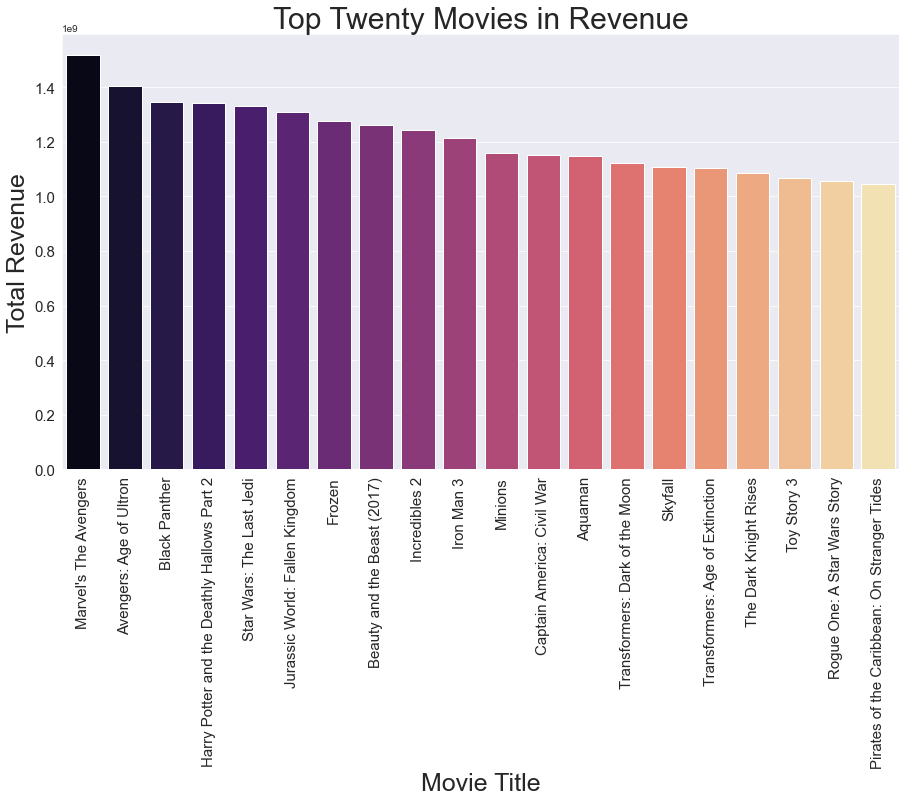

In [14]:
#Having found the top twenty movies in terms of the total gross, we can therefore create a bar graph to visualize this information 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def revenue_visualization(data,var_x,var_y):
    sns.set_style('darkgrid')
    bar, ax = plt.subplots(figsize=(15,8))
    ax=sns.barplot(x=var_x, y = var_y, data=data, palette='magma',orient='v')
    ax.set_title('Top Twenty Movies in Revenue', fontsize=30)
    ax.set_xlabel('Movie Title', fontsize=25)
    ax.set_ylabel('Total Revenue', fontsize=25)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(rotation=0,fontsize=15)
    bar.savefig(f"{var_x}_{var_y}.png")

revenue_visualization(top_twenty_movies, 'title', 'total_gross')    
    

From the bar graph we can see that *Marvel's The Avengers* is the highest grossing movie at 1.5 billion dollars. Note that the total gross is in billions. This is followed closely by Avengers: Age of Ultron at 1.4 billion dollars. The Avenger's movies seem to be doing well as they are the highest grossing movies.

**A recommendation from this could be that, Microsoft could work with the cast from these movies as they are definitely popular with the people. When creating films, Microsoft can cast the actors and actresses from Marvel's the Avengers.
Microsoft can also partner with the production teams of the highest grossing movies to produce quality content**

### Top 20 studios in terms of revenue

The first step is to group the total gross by studio to find the total gross per studio from all the movies they have created

In [14]:
#Function to calculate the mean of total gross the studios make from the movies
def group_by_studio_revenue(data,columns,item_to_group_by):
    grouped_data = data.groupby(item_to_group_by)[columns].sum()
    grouped_df = pd.DataFrame(grouped_data)
    grouped_df.reset_index(drop = False, inplace = True)
    
    return grouped_df

In [15]:
studio_grouping=group_by_studio_revenue(movie_gross,['total_gross'],'studio')

studio_grouping.reset_index(drop=False)
studio_grouping

,studio,total_gross
0,3D,1.600000e+07
1,A23,1.499098e+08
2,A24,2.808841e+09
3,ADC,1.499938e+08
4,AF,3.051341e+08
...,...,...
252,XL,1.502036e+08
253,YFG,7.597281e+07
254,Yash,8.573120e+08
255,Zee,1.671000e+06


In [16]:
top_twenty_studios=studio_grouping.sort_values('total_gross',ascending=False).head(20)
top_twenty_studios.reset_index(drop = False)
top_twenty_studios

,studio,total_gross
36,BV,4.436263e+10
246,WB,3.158468e+10
93,Fox,3.115511e+10
238,Uni.,2.998178e+10
215,Sony,2.273328e+10
185,Par.,2.007337e+10
247,WB (NL),1.040957e+10
134,LGF,9.753421e+09
113,IFC,7.848928e+09
148,Magn.,6.633386e+09


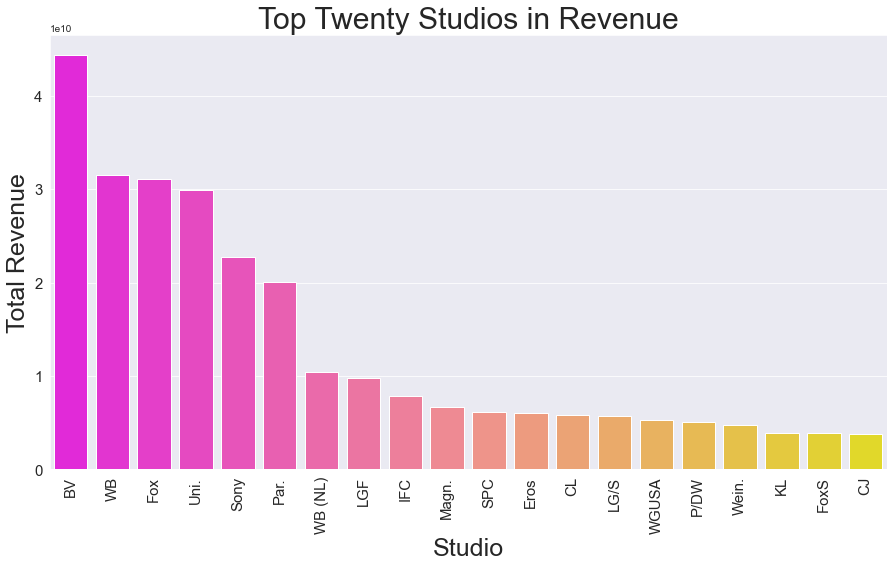

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def revenue_visualization(data,var_x,var_y):
    sns.set_style('darkgrid')
    bar, ax = plt.subplots(figsize=(15,8))
    ax=sns.barplot(x=var_x, y = var_y, data=data, palette='spring',orient='v')
    ax.set_title('Top Twenty Studios in Revenue', fontsize=30)
    ax.set_xlabel('Studio', fontsize=25)
    ax.set_ylabel('Total Revenue', fontsize=25)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(rotation=0,fontsize=15)
    bar.savefig(f"{var_x}_{var_y}.png")

revenue_visualization(top_twenty_studios, 'studio', 'total_gross')  

### Findings from part 1 analysis

From the above analysis we can see that Buena Vista (BV) makes the highest from the movies it creates. Followed by Warner Bros Studios (W.B), Fox, Universal Studios (Uni.) and Sony. These are the top 5 studios in terms of gross.

From further research done, the highest grossing movies are mostly action movies and animations.

### Recommedations from part 1 Analysis

The following are the recommendations that can be given to microsoft after analysing the movie gross data:
1. Microsoft could partmer with the top 5 highest grossing studios to create their films. They could partner with Buena Vista(BV) , Warner Bros (WB) Studios, Fox, Universal Studios or Sony. This will enable Microsoft to gain financally from the movies they create worldwide.
2.The highest grossing movies are Marvel's The Avengers, Avenger's Age of Ultron and Black Panther. These are taking the top 3 spots. One recommendation is that Microsoft casts the actors and actresses from these films. They could also work with the directors from these films. 
3.Looking at the top 20  highest grossing movies, most of then are action movies . These include: Marvel's The Avengers, Avenger's Age of Ultron, Black Panther, Star Wars: The last Jedi,Skyfall, Aquaman, Iron Man 3, Transformers Age of Extintion among others. Animations such as Toy Story 3, Frozen, Beauty and the Beast and Incredibles 2 have also made it to the list of the highest Grossing movies. Therefore while creating Films, Microsoft could look into creating Action movies and Animations as they bring in the highest income worldwide.

## Part Two: Analysis of the ```'tmdb.movies.xlsx '``` dataset

The 'tmdb.movies.xlsx' data set contains movie titles, their popularity and their ratings and votes

### Loading the dataset

In [19]:
#Using pandas to load the data
df = pd.read_excel('tmdb.movies.xlsx', index_col=0)

### Nature of the data set

In [20]:
#Checking the first 5 rows of the data
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
#Checking the last 5 rows of the data
df.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [22]:
#Checking for the information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


From the cell above, all the columns have complete data. There are no null values in the data.
The ```.info()``` method also shows the types of data in each of the columns. 

In [23]:
#Checking for duplicates
df.duplicated().sum()

1020

From the above, there are 1020 duplicates. This shall be dealt with in the data cleaning part

### Data Cleaning

From the above analysis, we found out that there are no null values. However there are duplicates. Therefore the first step is to drop the duplicates.

In [24]:
#Dropping the duplicates
df=df.drop_duplicates()
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Now that we have gotten rid of the duplicates the second step is to drop the columns we will not need in our anaysis.

In [25]:
#Dropping the columns not needed.
cleaned_df = df.drop(columns = ['genre_ids', 'original_title'])

In [26]:
# Checking how the data appears after dropping the cloumns
cleaned_df.head()

,id,original_language,popularity,release_date,title,vote_average,vote_count
0,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,en,27.920,2010-07-16,Inception,8.3,22186


### Exploring and Visualization of the data set

Having cleaned the data, we can now proceed to explore it to gain some insights.

We can start by finding the **summary statistics**

In [26]:
# Finding the summary statistics using the .describe() function
cleaned_df.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


The above results show the summary statistics of each of the columns. The means, minimum values, maximum values and the interquartile ranges

### Top 10 movies with the highest vote average

 We can go ahead and find the top ten movies with the highest vote average

In [28]:
top_ten_movies = cleaned_df[['title','vote_average']].sort_values('vote_average', ascending = False ). head(10)
top_ten_movies


,title,vote_average
12835,OJ: Trial of the Century,10.0
16532,Psychoacoustic,10.0
16521,Afterimage,10.0
16522,Healed,10.0
16523,SelectED,10.0
16524,No Charge,10.0
16525,If I Could Talk,10.0
16526,I've Always Been Here,10.0
16527,Dear Sofia: A Royal Collection,10.0
16528,Black Water Wilderness,10.0


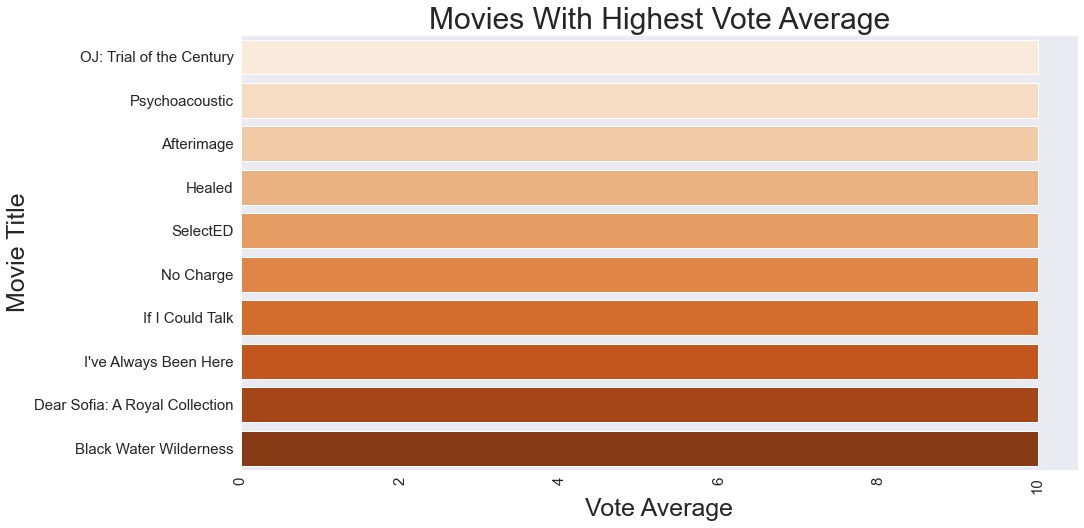

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def vote_average_visualization(data,var_x,var_y):
    sns.set_style('dark')
    bar, ax = plt.subplots(figsize=(15,8))
    ax=sns.barplot(x=var_x, y = var_y, data=data, palette='Oranges',orient='h')
    ax.set_title('Movies With Highest Vote Average', fontsize=30)
    ax.set_ylabel('Movie Title', fontsize=25)
    ax.set_xlabel('Vote Average', fontsize=25)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(rotation=0,fontsize=15)
    bar.savefig(f"{var_x}_{var_y}.png")

vote_average_visualization(top_ten_movies,  'vote_average', 'title')    
    

From the above plot, the top 10 movies all have the highest vote average which is 10

The top 10 movies in terms of vote average are:
1.OJ: Trial of the Century
2.Psychoacoustic
3.Afterimage
4.Healed
5.SelectED
6.No Charge
7.If I could Talk
8.I've Always Been Here
9.Dear Sofia: A Royal Collection
10. Black Water Wilderness    
    

### Top 10 movies in terms of vote count

In [30]:
#The next analysis we can do is finding the movie with the highest vote count.
top_movies_vote_count = cleaned_df[['title','vote_count']].sort_values('vote_count', ascending = False ). head(10)
top_movies_vote_count

,title,vote_count
4,Inception,22186
17383,Deadpool,20175
5179,The Avengers,19673
6,Avatar,18676
11032,Interstellar,18597
11021,Guardians of the Galaxy,17958
5189,Django Unchained,15725
5235,The Hunger Games,14587
14177,Mad Max: Fury Road,14454
7881,Iron Man 3,14155


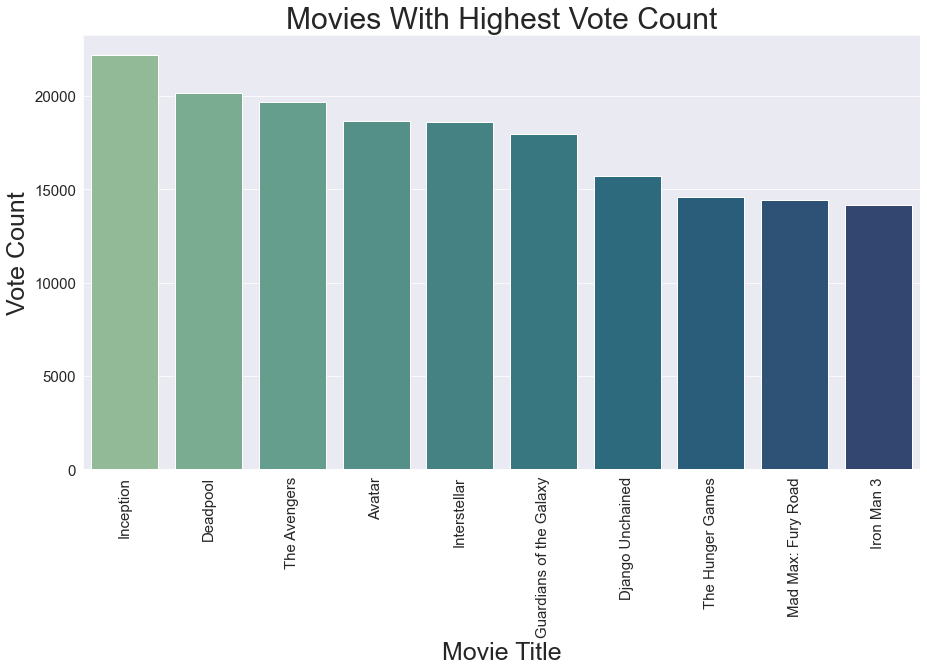

In [34]:
def vote_count_visualization(data,var_x,var_y):
    sns.set_style('darkgrid')
    bar,ax = plt.subplots(figsize=(15,8))
    
    ax = sns.barplot(x=var_x, y = var_y, data = data, palette='crest')
    ax.set_title('Movies With Highest Vote Count', fontsize=30)
    ax.set_xlabel('Movie Title', fontsize = 25)
    ax.set_ylabel('Vote Count', fontsize=25)
    
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    bar.savefig(f"{var_x}_{var_y}.png")
    
vote_count_visualization(top_movies_vote_count, 'title', 'vote_count')    

### Is there a correlation between popularity and vote average? 

To check for correlation between the popularity and the vote average, we will construct a scatter plot

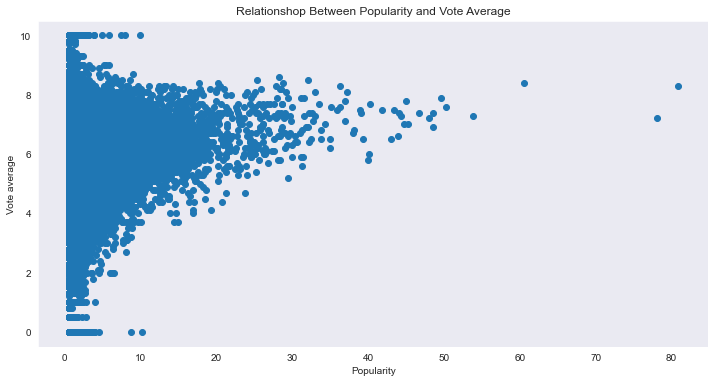

In [37]:
#Creating a scatter plot of popularity vs the vote average
scatter,ax = plt.subplots(figsize=(12,6))
ax.scatter('popularity', 'vote_average', data=cleaned_df)
ax.set_title('Relationshop Between Popularity and Vote Average')
ax.set_xlabel('Popularity')
ax.set_ylabel('Vote average')
plt.show()


If we are to draw a line throught the scatter plot, we will see that there is a posituve correlation between the vote average and the popularity . The higher the popilarity the the higher the vote average.

## Finding the most used original language

In [38]:
#Finding the number of movies each language has been used in
language_count = cleaned_df['original_language'].value_counts()
language_count

en    22384
fr      483
es      439
ru      295
ja      244
      ...  
yi        1
cr        1
nb        1
hz        1
kk        1
Name: original_language, Length: 76, dtype: int64

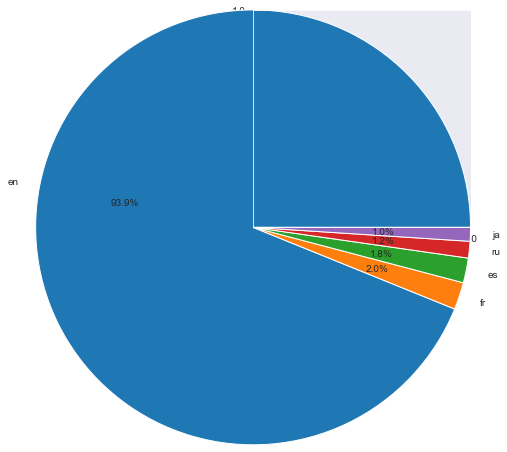

In [33]:
#Creating a pie chart of the top 5 most used  language
languages = cleaned_df['original_language'].str.get_dummies(sep ='|')
language_col = languages[languages.columns].apply(lambda x:sum(x.values))
language_col.sort_values(0,ascending = False).head(5).plot.pie(autopct = "%1.1f%%",frame = True)
plt.show()

From the above analysis we checked the top 5 used languages in films. English is seen to take the lead as it is used in 93.9% of the films. 

### Finding the top 10 most popular movies 

In [36]:
#Finding the top ten most popular movies
top_ten_popular = cleaned_df[['title','popularity']].sort_values('popularity', ascending = False ). head(10)
top_ten_popular

,title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289
11021,Guardians of the Galaxy,49.606
20617,Blade Runner 2049,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,Ralph Breaks the Internet,48.057
20618,Spider-Man: Homecoming,46.775


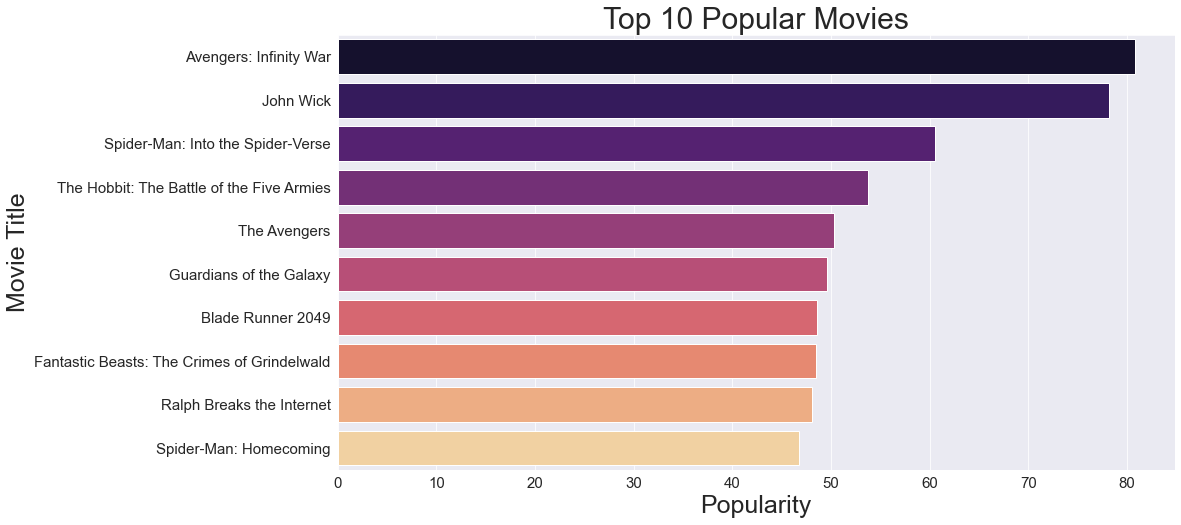

In [39]:
def popularity_visualization(data,var_x,var_y):
    sns.set_style('darkgrid')
    bar, ax = plt.subplots(figsize=(15,8))
    ax = sns.barplot(x=var_x, y = var_y, data= data,palette='magma', orient='h')
    ax.set_title('Top 10 Popular Movies',fontsize=30)
    ax.set_ylabel('Movie Title', fontsize=25)
    ax.set_xlabel('Popularity', fontsize=25)
    plt.xticks(rotation=0,fontsize=15)
    plt.yticks(rotation=0,fontsize=15)
    
popularity_visualization(top_ten_popular,'popularity','title')    

### Findings from Part 2 Analysis


The first finding is that English is the most used languge in the films .
It is also evident that Avengers Infinity War is the most popular Movie, followed by John Wick then Spider_Man: Into the Spider Verse. Those make the top 3 most popular movies.
There is a correlation between the popularity and the vote average. Therefore, the higher the popularity the higher the vote

### Recommendations from Part 2 Analysis

The first recommendation is that Microsoft uses English in their films. Considering English is the most used Language in the above analysis. Furthermore, English is used in many partsof the world making it suitable.
In line with the findings from the Part 1 one analysis, it is evident that Action movies are doing well. Specifically the Avenger's movie Franchise. In the second data analysis we see that Avenger's Infinity War is the most popular.
Therefore Microsoft should consider venturing in Action movies.

Looking at the top ten popular movies, Microsoft could cast actors and actresses from these movies since the audience is already familiar with them. This increases the chances that the movies made by Microsoft will be popular. Microsoft could also work with the production team of these movies to produce quality and popular movies.

Once Microsoft is able to create their movies, they should also create platforms where their audience can vote and give reviews so that they are able to understand how to better their film creation.